# CHAPTER 5: Exponential Distributions

### This code generates figure 1 from Chapter 5: Exponential Distributions (vol I)

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

## Drichlet Distribution

We illustrate the Dirichlet distribution in Fig. $5.1$. Each plot in the figure shows $N=100$ samples from a Dirichlet distribution of order $L=3$. The three parameters $\{s_1,s_2,s_3\}$ are set equal to 1 in the plot on the left, while the values of $s_2$ and $s_3$ are increased to $10$ in the middle and rightmost plots. Observe how by controlling the value of the $\{s_{\ell}\}$ parameters we can concentrate the distribution of the probabilities $\{y_{\ell}\}$ in different regions within the probability simplex (represented by the triangle connecting the unit probability values on the three axes). We generated the Dirichlet realizations for this figure by exploiting the following useful property for the gamma distribution defined  in Prob. $5.2$. Assume we generate a collection of $L$ independent gamma-distributed random variables $\mathcal{x}_{\ell}$, where each $\mathcal{x}_{\ell}\sim\mbox{Gamma}(s_{\ell},\beta)$. That is, each gamma distribution has parameters $\alpha=s_{\ell}$ and arbitrary $\beta$ (we use $\beta=1$). We normalize each $\mathcal{x}_{\ell}$ by the sum of the $L$ variables generated in this manner and introduce
$$
\mathcal{y}_{\ell}\triangleq \mathcal{x}_{\ell}\Bigr/\sum_{\ell'=1}^{L} \mathcal{x}_{\ell}',\;\;\ell=1,2,\ldots,L
$$
Then, it is known that the variables $\mathcal{y}_{\ell}$ will follow a Dirichlet distribution. The proof of this result is left as an exercise --- see Prob. $5.4$.

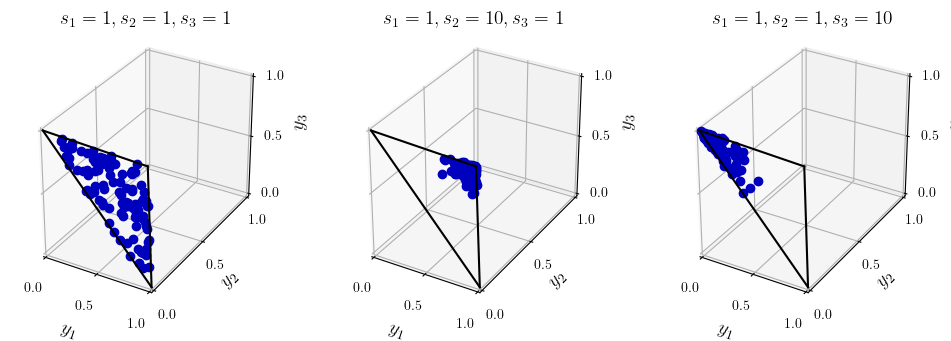

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 100  # number of samples to be generated from a Dirichlet distribution
L = 3    # order of the distribution
s = np.array([1, 1, 1]) # positive s-parameters
s2 = np.array([1, 10, 1])
s3 = np.array([1, 1, 10])

y = np.zeros((L,N))

for n in range(N):
    z = np.zeros(L)
    for ell in range(L):
      z[ell] = np.random.gamma(s[ell], 1)  # generates L Gamma-distributed RVs
    y[:,n] = z/np.sum(z); # normalize each entry of z by the sum to get Dirichlet

    
## figure 1 (Dirichlet distributions with different parameters)
## the figure involves three subplots

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.rcParams['figure.figsize']=12,12 #set the figure size here
fig = plt.figure()

# subplot-1
ax1 = fig.add_subplot(331, projection='3d')
ax1.plot3D(y[0], y[1], y[2], 'bo', markerfacecolor=(0, 0, 0.75),markeredgecolor=(0, 0, 0.75))
ax1.set_xlabel(r'$y_1$', fontsize=14)
ax1.set_ylabel(r'$y_2$', fontsize=14)
ax1.set_zlabel(r'$y_3$', fontsize=14)
ax1.set_title(r'$s_1=1, s_2=1, s_3=1$', fontsize=14)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_zlim([0, 1])
ax1.set_xticks([0, 0.5, 1])
ax1.set_yticks([0, 0.5, 1])
ax1.set_zticks([0, 0.5, 1])
ax1.grid()

p1 = [0, 0, 1]
p2 = [1, 0, 0]
p3 = [0, 1, 0]


ax1.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='k')
ax1.plot3D([p3[0], p1[0]], [p3[1], p1[1]], [p3[2], p1[2]], color='k')
ax1.plot3D([p3[0], p2[0]], [p3[1], p2[1]], [p3[2], p2[2]], color='k')



# subplot-2
y = np.zeros((L,N))
for n in range(N):
    z = np.zeros(L)
    for ell in range(L):
      z[ell] = np.random.gamma(s2[ell], 1) # generates L Gamma-distributed RVs
    y[:,n] = z/np.sum(z); # normalize each entry of z by the sum to get Dirichlet

ax2 = fig.add_subplot(332, projection='3d')
ax2.plot3D(y[0], y[1], y[2], 'bo', markerfacecolor=(0, 0, 0.75),markeredgecolor=(0, 0, 0.75))
ax2.set_xlabel(r'$y_1$', fontsize=14)
ax2.set_ylabel(r'$y_2$', fontsize=14)
ax2.set_zlabel(r'$y_3$', fontsize=14)
ax2.set_title(r'$s_1=1, s_2=10, s_3=1$', fontsize=14)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_zlim([0, 1])
ax2.set_xticks([0, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax2.set_zticks([0, 0.5, 1])
ax2.grid()

p1 = [0, 0, 1]
p2 = [1, 0, 0]
p3 = [0, 1, 0]


ax2.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='k')
ax2.plot3D([p3[0], p1[0]], [p3[1], p1[1]], [p3[2], p1[2]], color='k')
ax2.plot3D([p3[0], p2[0]], [p3[1], p2[1]], [p3[2], p2[2]], color='k')
             
             
# subplot-3
y = np.zeros((L,N))
for n in range(N):
    z = np.zeros(L)
    for ell in range(L):
      z[ell] = np.random.gamma(s3[ell], 1) # generates L Gamma-distributed RVs
    y[:,n] = z/np.sum(z); # normalize each entry of z by the sum to get Dirichlet
    

    
ax3 = fig.add_subplot(333, projection='3d')
ax3.plot3D(y[0], y[1], y[2], 'bo', markerfacecolor=(0, 0, 0.75),markeredgecolor=(0, 0, 0.75))
ax3.set_xlabel(r'$y_1$', fontsize=14)
ax3.set_ylabel(r'$y_2$', fontsize=14)
ax3.set_zlabel(r'$y_3$', fontsize=14)
ax3.set_title(r'$s_1=1, s_2=1, s_3=10$', fontsize=14)
ax3.set_xlim([0, 1])
ax3.set_ylim([0, 1])
ax3.set_zlim([0, 1])
ax3.set_xticks([0, 0.5, 1])
ax3.set_yticks([0, 0.5, 1])
ax3.set_zticks([0, 0.5, 1])
ax3.grid()

p1 = [0, 0, 1]
p2 = [1, 0, 0]
p3 = [0, 1, 0]


ax3.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='k')
ax3.plot3D([p3[0], p1[0]], [p3[1], p1[1]], [p3[2], p1[2]], color='k')
ax3.plot3D([p3[0], p2[0]], [p3[1], p2[1]], [p3[2], p2[2]], color='k')

#scaling
ax1.set_box_aspect([0.6, 1, 0.7])  # [x_scale, y_scale, z_scale]
ax2.set_box_aspect([0.6, 1, 0.7])
ax3.set_box_aspect([0.6, 1, 0.7])


plt.show()

**Figure $5.1$** Each plot shows $N=100$ samples from a Dirichlet distribution of order $L=3$. The parameters $\{s_1,s_2,s_3\}$ are set equal to 1 in the plot on the left, while the values of $s_2$ and $s_3$ are increased to $10$ in the middle and rightmost plots.